In [1]:
!pip install -r /kaggle/input/scene-manipulation-dataset/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

In [2]:
!cp /kaggle/input/scene-manipulation-dataset/utils.py .

In [3]:
%run utils.py

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O sam_model.pth

--2025-06-14 18:35:34--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.13, 3.171.22.118, 3.171.22.68, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_model.pth’

sam_model.pth       100%[===================>]   2.39G   289MB/s    in 9.2s    

2025-06-14 18:35:43 (265 MB/s) - ‘sam_model.pth’ saved [2564550879/2564550879]



In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint="sam_model.pth")
sam.to(device=device)
sam_predictor = SamPredictor(sam)

yolo_model = YOLO('yolov8l.pt')

nlp_model = spacy.load("en_core_web_sm")

100%|██████████| 83.7M/83.7M [00:00<00:00, 156MB/s] 


In [6]:
instruction = "Move the car to the left and add sunset light"
parsed_actions = parse_instruction(nlp_model,instruction)
print(parsed_actions)
image_sources = [
    ('url', 'https://images.pexels.com/photos/3729464/pexels-photo-3729464.jpeg'),
    ('url', 'https://images.pexels.com/photos/1805164/pexels-photo-1805164.jpeg'),
    ('local','/kaggle/input/scene-manipulation-dataset/AdobeStock_475438898-1600x1067.jpeg'),
    ('local','/kaggle/input/scene-manipulation-dataset/AmericanGoldfinch_MattWilliams_4000x2200.jpg')
]

target_classes = ['car', 'truck', 'bus', 'motorcycle','bird','dog','bear']

results = process_images(
    image_sources,
    target_classes,
    conf_threshold=0.7,
    predictor=sam_predictor,
    yolo=yolo_model
)

{'object': 'car', 'relocation': 'left', 'relighting': 'sunset light'}
Processing image 1/4

0: 448x640 1 car, 67.8ms
Speed: 34.1ms preprocess, 67.8ms inference, 445.7ms postprocess per image at shape (1, 3, 448, 640)
Found 1 objects
Processing image 2/4

0: 640x448 1 dog, 46.8ms
Speed: 4.6ms preprocess, 46.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)
Found 1 objects
Processing image 3/4

0: 448x640 1 bird, 23.3ms
Speed: 2.3ms preprocess, 23.3ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Found 1 objects
Processing image 4/4

0: 352x640 1 bird, 48.5ms
Speed: 12.1ms preprocess, 48.5ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
Found 1 objects



Image 1 - Found 1 objects:
  car: confidence=0.954, mask_score=1.009


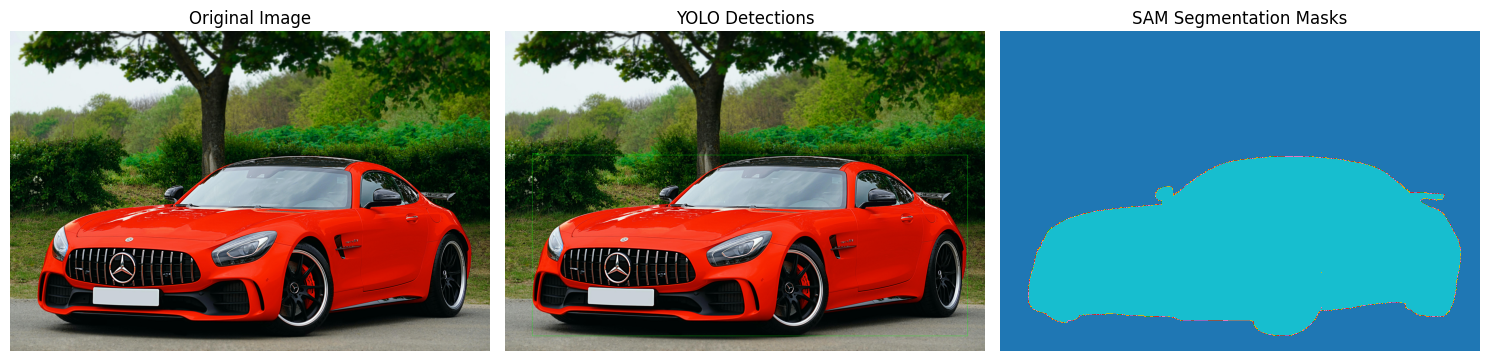

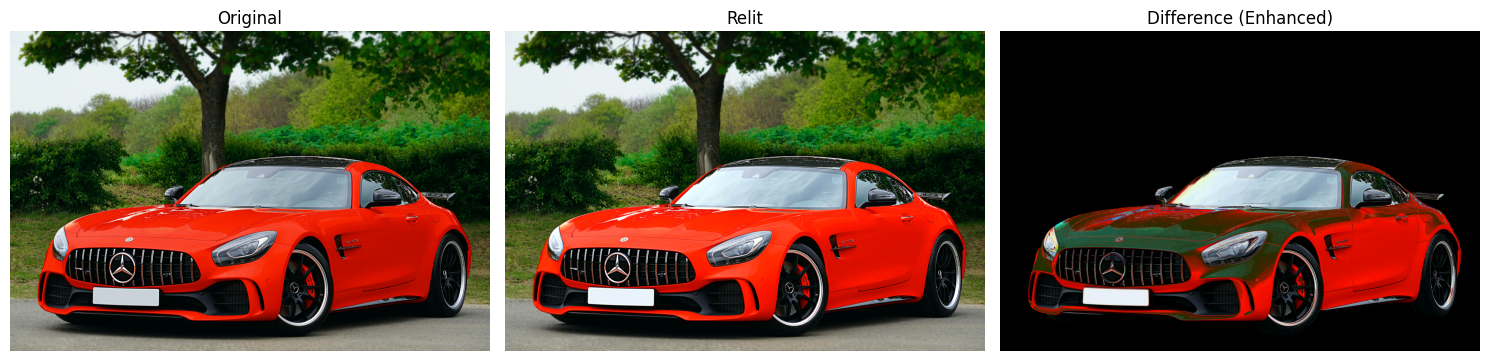

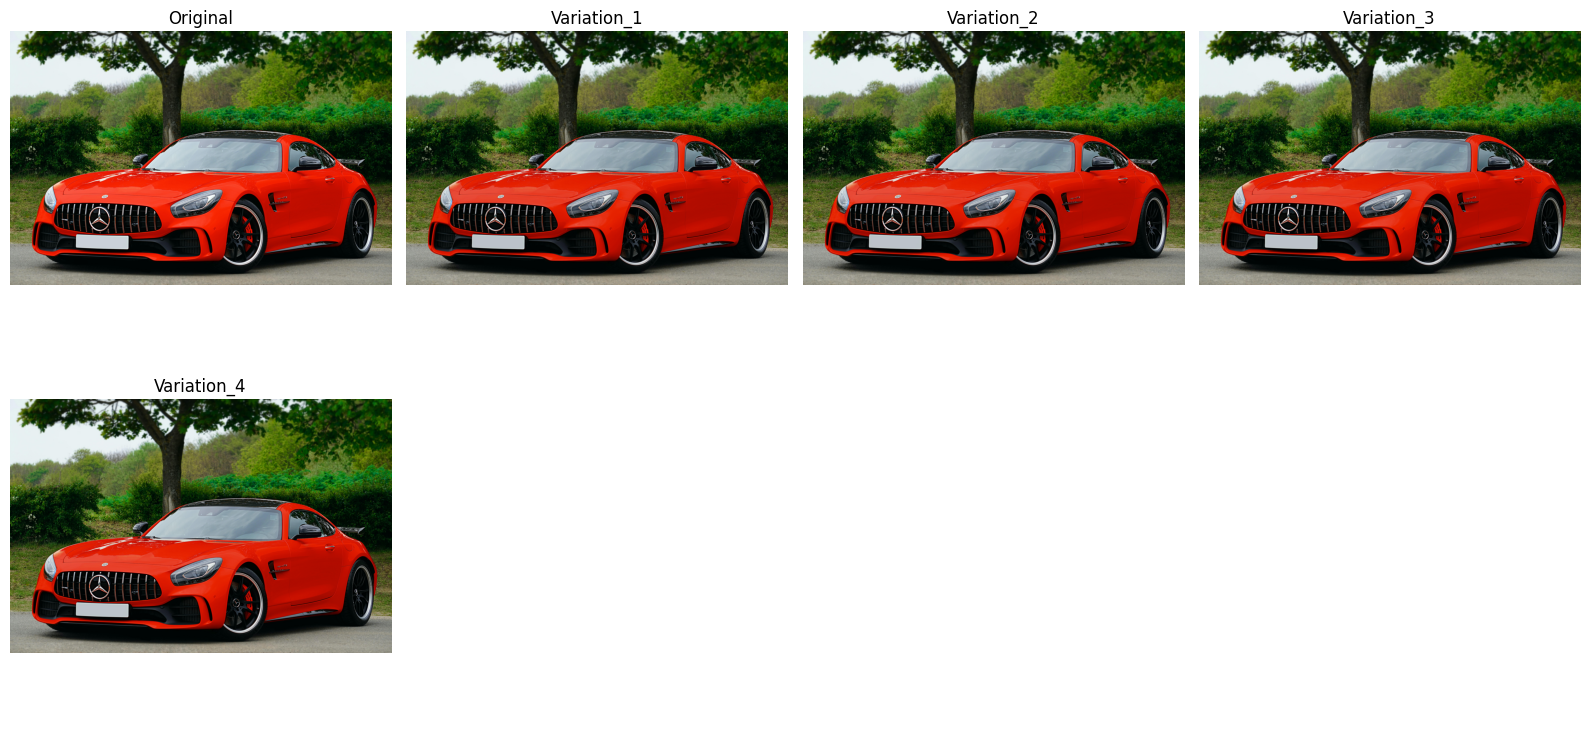


Image 2 - Found 1 objects:
  dog: confidence=0.938, mask_score=1.007


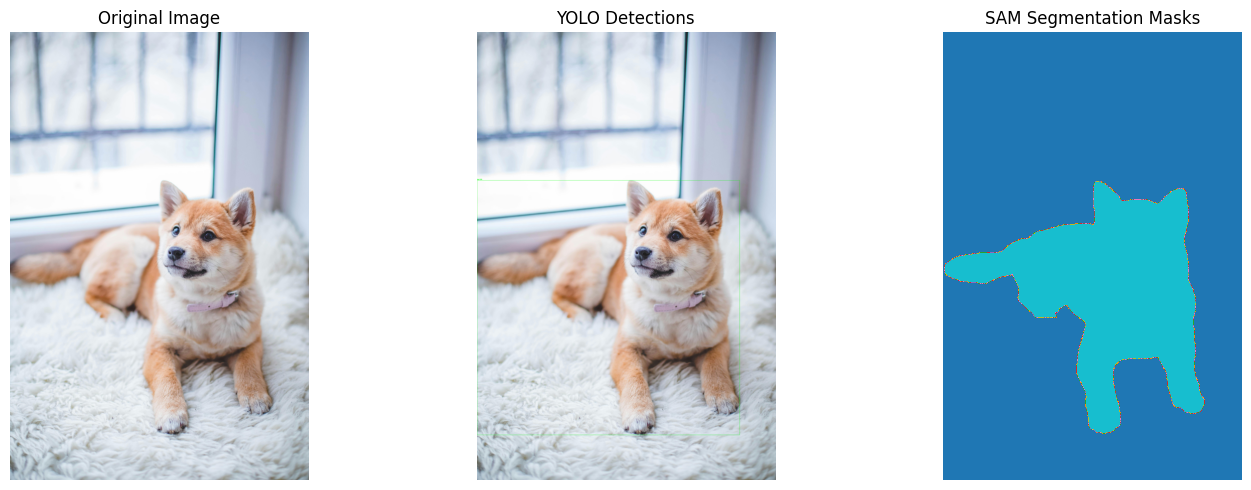

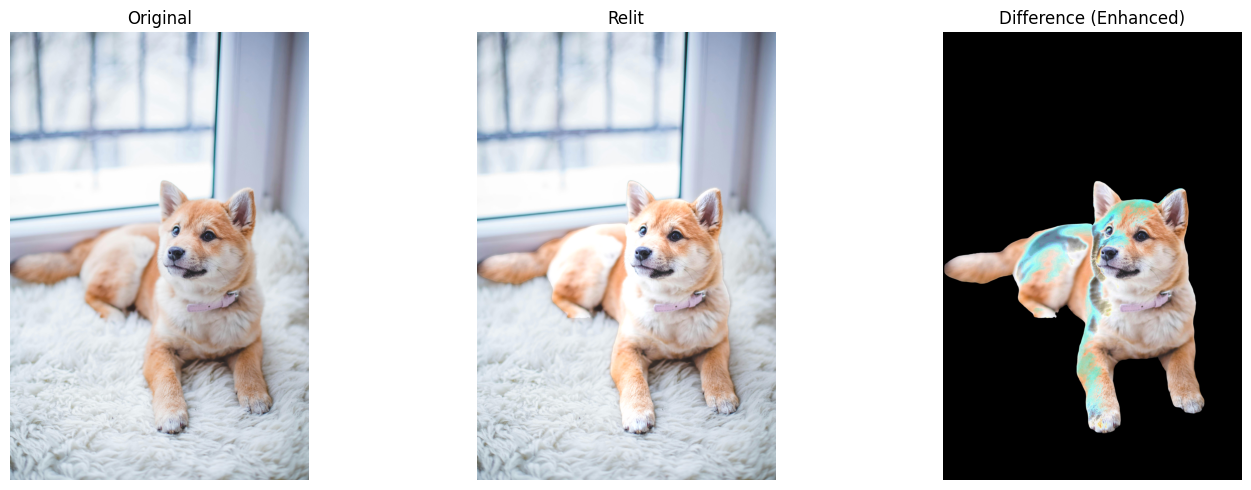

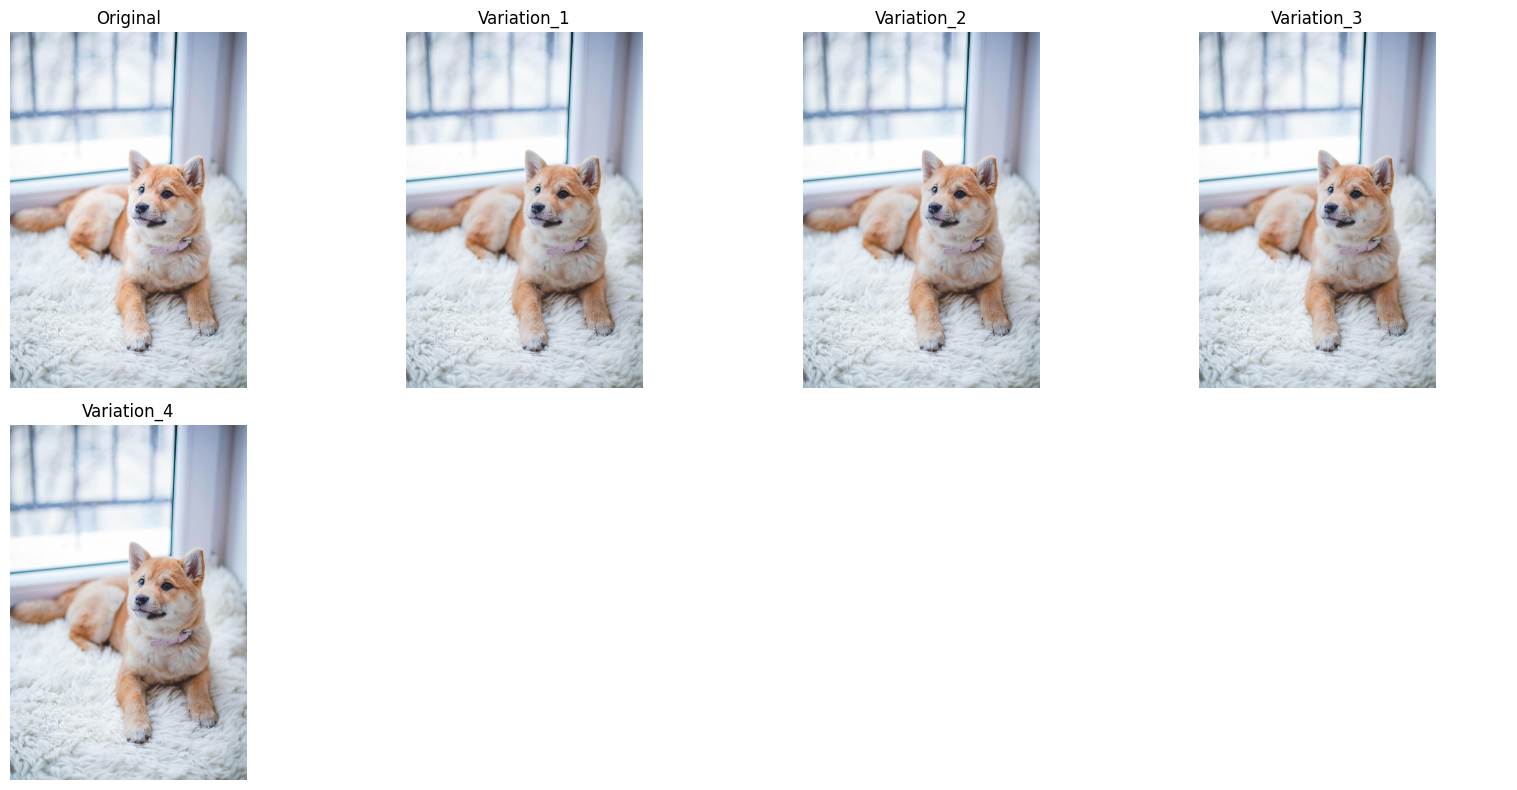


Image 3 - Found 1 objects:
  bird: confidence=0.963, mask_score=1.005


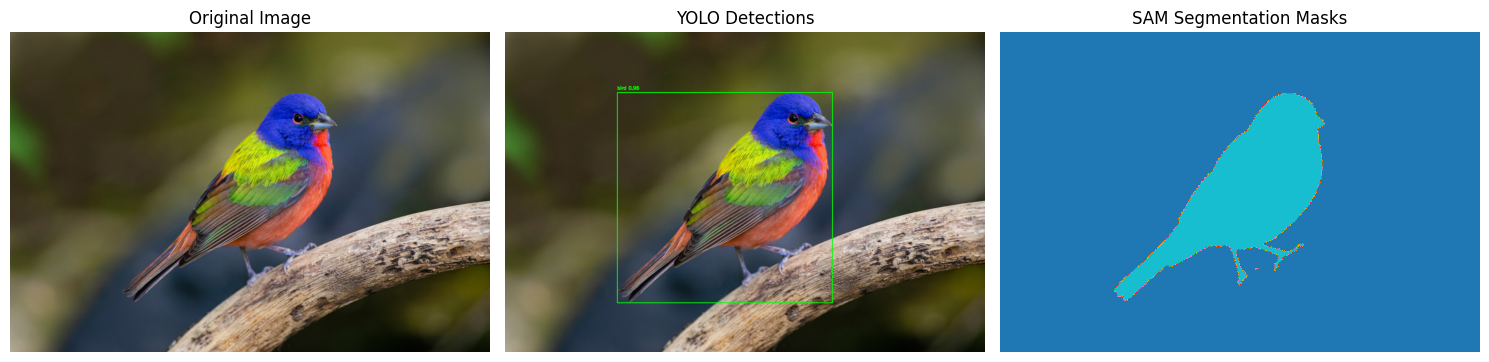

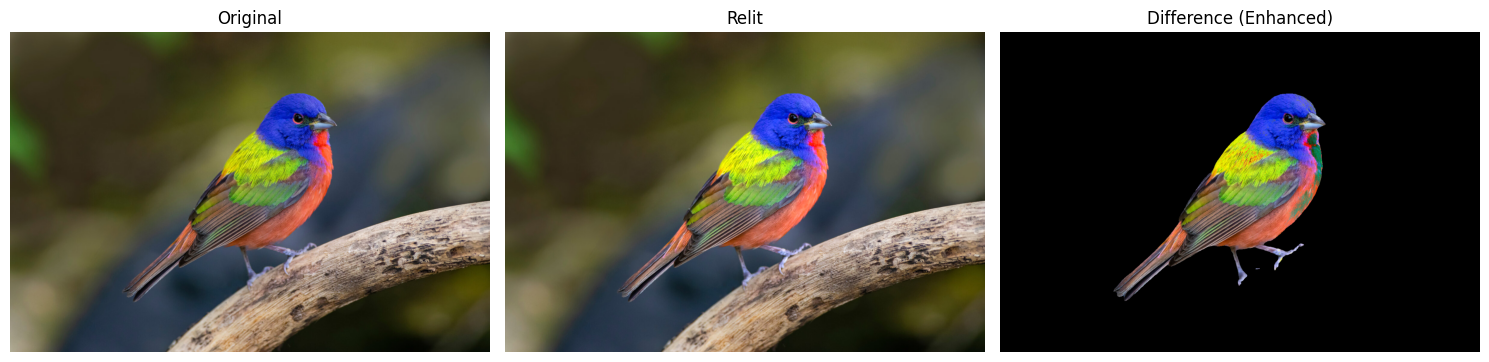

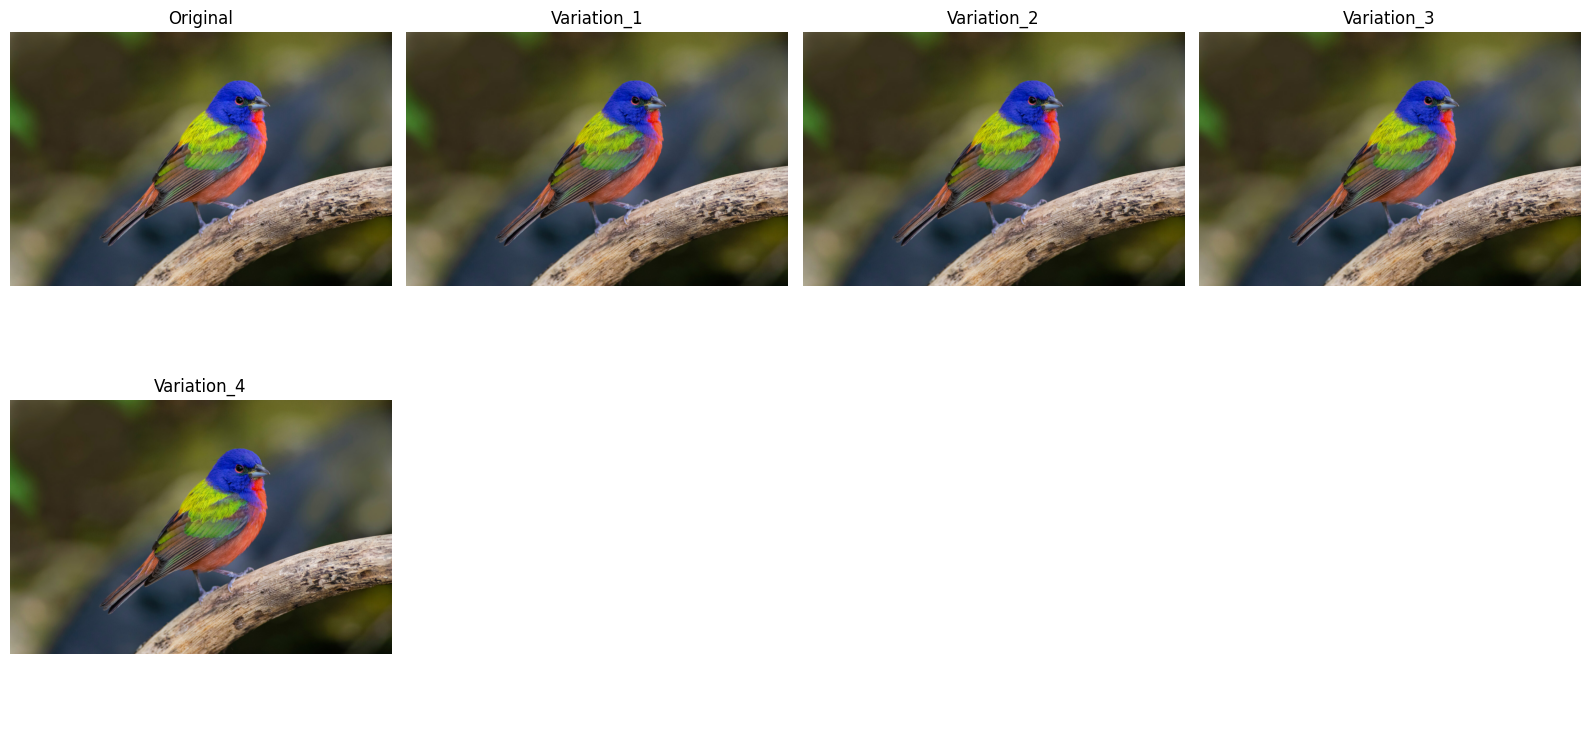


Image 4 - Found 1 objects:
  bird: confidence=0.937, mask_score=1.003


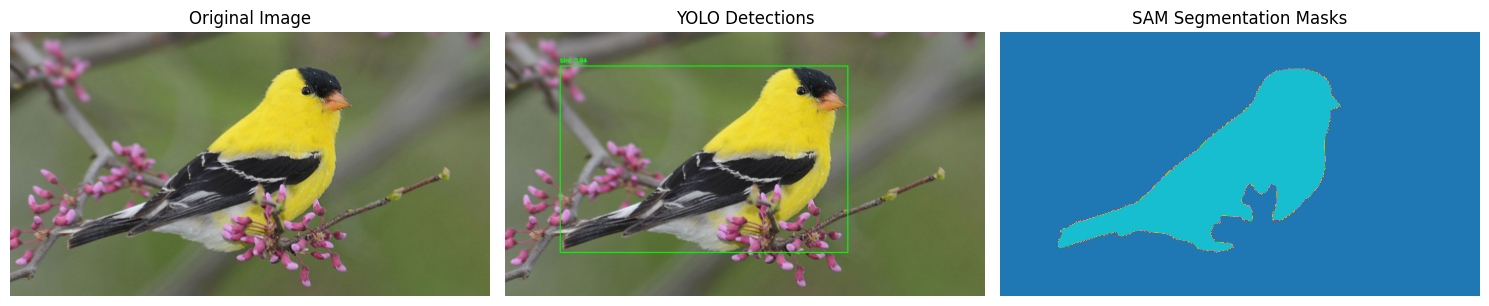

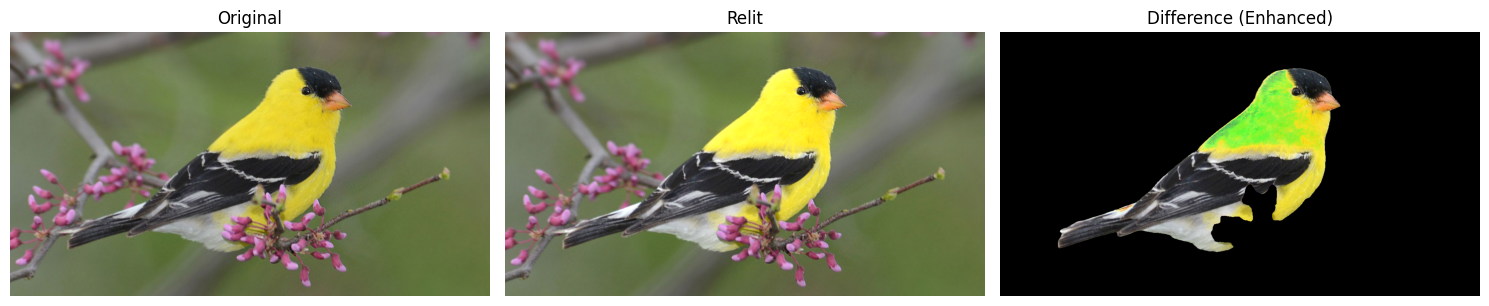

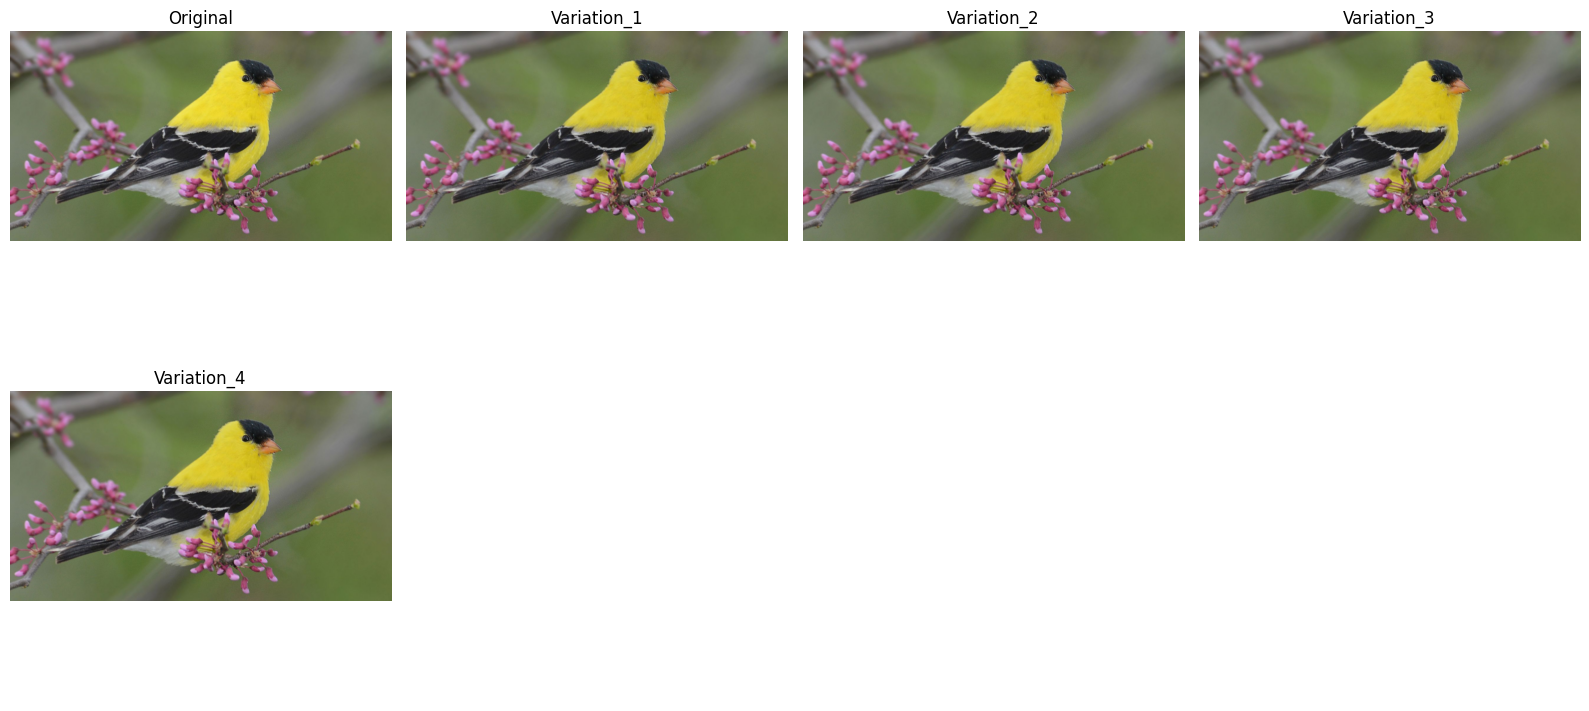

In [7]:
for i, result in enumerate(results):
    print(f"\nImage {i+1} - Found {len(result['results'])} objects:")
    for obj in result['results']:
        print(f"  {obj['class']}: confidence={obj['confidence']:.3f}, mask_score={obj['mask_score']:.3f}")
    visualize_results(result['image'], result['results'])

    relit_image = relight_objects(result['image'], result['results'])
    visualize_relighting(result['image'], relit_image, result['results'])

    variations = create_lighting_variations(result['image'], result['results'])
    visualize_lighting_variations(result['image'], variations)

E0000 00:00:1749926283.850335      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749926283.965628      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🎯 Running Scene Manipulation Example...
📋 Instruction: Move the car to the left and add sunset lighting
🖼️ Processing 1 image(s)
🚀 Initializing Scene Manipulation Pipeline...
Loading Stable Diffusion Inpainting model...


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


✅ Stable Diffusion model loaded successfully
Loading CLIP model for evaluation...


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

✅ CLIP model loaded successfully
📝 Parsed instruction: {'objects': ['car'], 'actions': ['move', 'add'], 'spatial_references': ['left'], 'lighting_conditions': ['sunset', 'lighting'], 'modifiers': []}
Processing image 1/1

0: 448x640 1 car, 51.3ms
Speed: 4.5ms preprocess, 51.3ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Found 1 objects

🔄 Processing image 1/1
⚠️ Diffusion inpainting failed: CUDA out of memory. Tried to allocate 4.72 GiB. GPU 0 has a total capacity of 14.74 GiB of which 4.41 GiB is free. Process 3597 has 10.33 GiB memory in use. Of the allocated memory 10.06 GiB is allocated by PyTorch, and 121.16 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
📝 Falling back to OpenCV inpainting...
Visualization saved to scene_ma

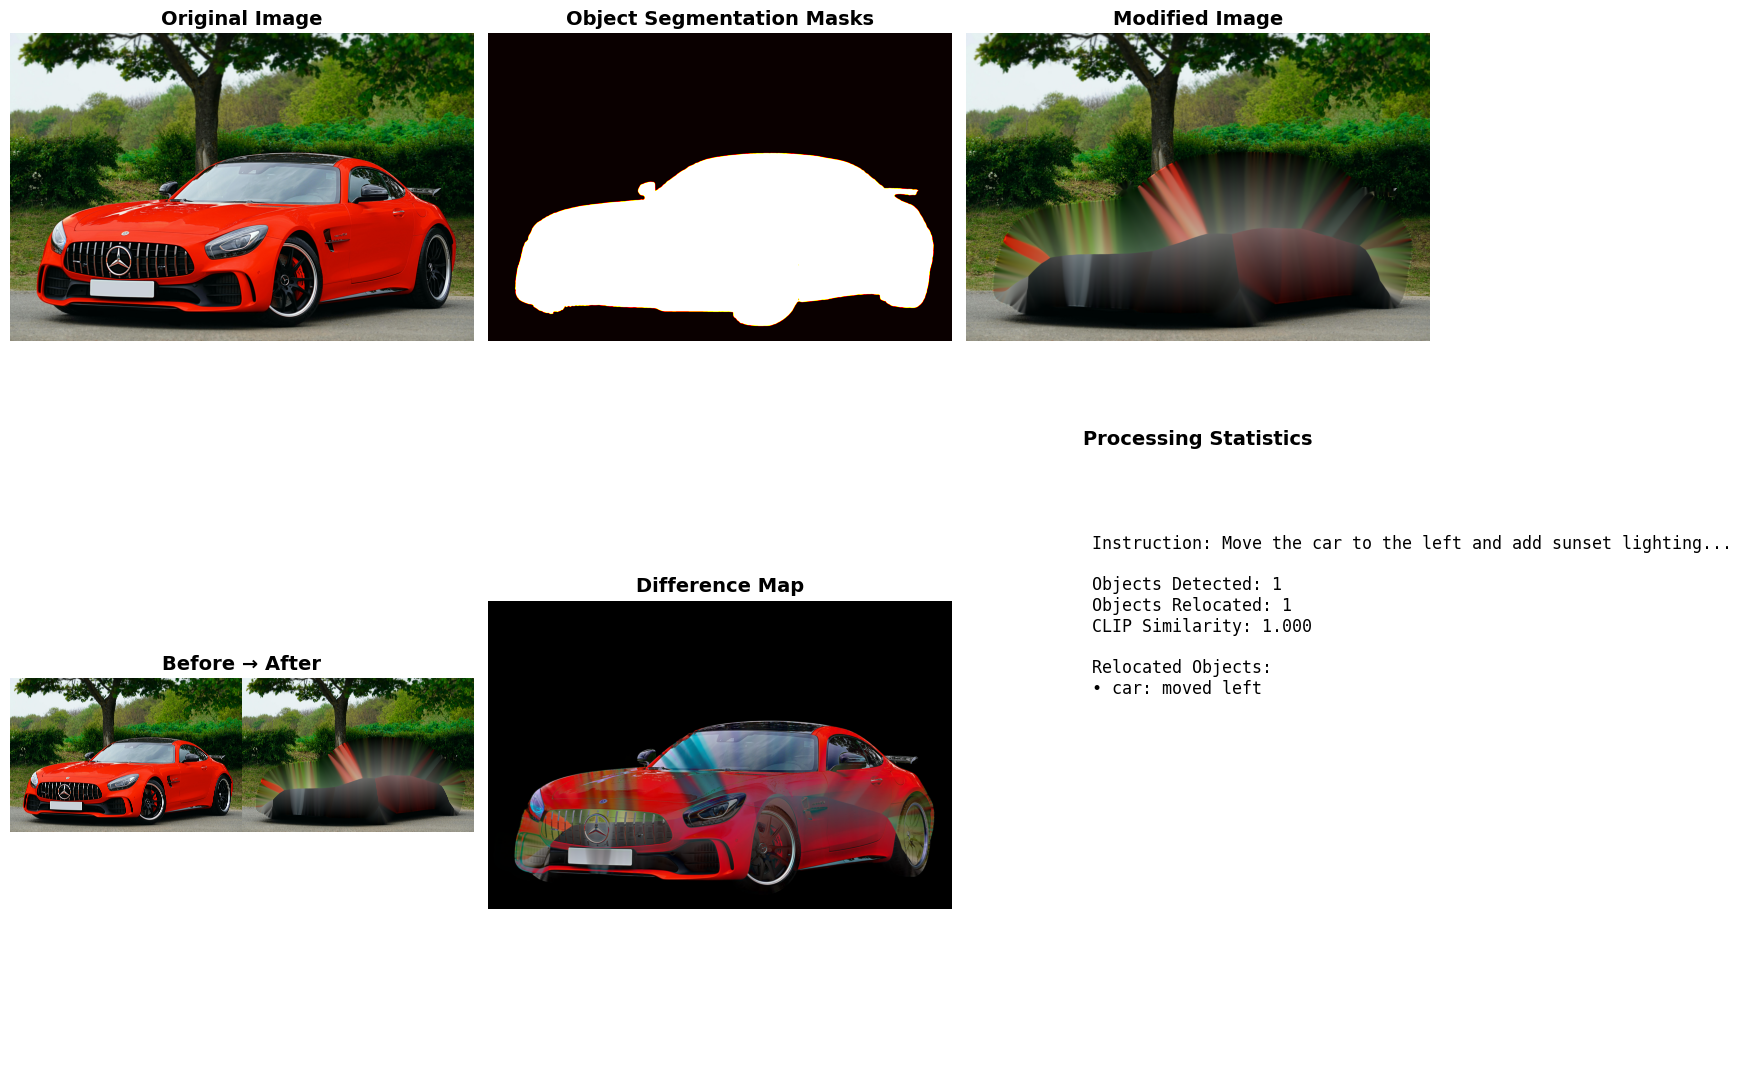

✅ Successfully processed image 1
🎉 Pipeline completed! Processed 1 images successfully.
✅ Scene manipulation completed successfully!
📊 Results: 1 images processed


In [8]:
# Complete Scene Manipulation Pipeline
# Missing implementations for object relocation, advanced inpainting, and evaluation

import torch
import numpy as np
from PIL import Image, ImageDraw
import cv2
from diffusers import StableDiffusionInpaintPipeline, StableDiffusionPipeline
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

class SceneManipulator:
    def __init__(self, device="cuda" if torch.cuda.is_available() else "cpu"):
        self.device = device
        self.inpaint_pipe = None
        self.clip_model = None
        self.clip_processor = None
        self._load_models()
    
    def _load_models(self):
        """Load diffusion and CLIP models"""
        try:
            print("Loading Stable Diffusion Inpainting model...")
            # Try loading with simplified parameters first
            self.inpaint_pipe = StableDiffusionInpaintPipeline.from_pretrained(
                "runwayml/stable-diffusion-inpainting",
                torch_dtype=torch.float16 if self.device == "cuda" else torch.float32,
                safety_checker=None,
                requires_safety_checker=False
            )
            
            # Move to device after loading
            if self.device == "cuda":
                self.inpaint_pipe = self.inpaint_pipe.to(self.device)
                
            print("✅ Stable Diffusion model loaded successfully")
            
        except Exception as e:
            print(f"⚠️ Failed to load Stable Diffusion model: {e}")
            print("📝 Using fallback inpainting method...")
            self.inpaint_pipe = None
        
        try:
            print("Loading CLIP model for evaluation...")
            self.clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
            self.clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
            
            if self.device == "cuda":
                self.clip_model = self.clip_model.to(self.device)
                
            print("✅ CLIP model loaded successfully")
            
        except Exception as e:
            print(f"⚠️ Failed to load CLIP model: {e}")
            print("📝 CLIP similarity scoring will be disabled...")
            self.clip_model = None
            self.clip_processor = None
    
    def create_inpainting_mask(self, segmentation_results: List[Dict], image_shape: Tuple[int, int], 
                              target_objects: List[str] = None, expand_mask: int = 10) -> np.ndarray:
        """
        Create inpainting mask from segmentation results
        Args:
            segmentation_results: Results from segment_objects
            image_shape: (height, width) of the image
            target_objects: List of object classes to include in mask
            expand_mask: Pixels to expand mask for better inpainting
        Returns:
            Binary mask for inpainting
        """
        mask = np.zeros(image_shape, dtype=np.uint8)
        
        for result in segmentation_results:
            if target_objects is None or result['class'] in target_objects:
                object_mask = result['mask'].astype(np.uint8)
                
                # Expand mask slightly for better inpainting
                if expand_mask > 0:
                    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (expand_mask*2+1, expand_mask*2+1))
                    object_mask = cv2.dilate(object_mask, kernel, iterations=1)
                
                mask = np.maximum(mask, object_mask)
        
        return mask
    
    def extract_object_with_context(self, image: Image.Image, mask: np.ndarray, 
                                   context_padding: int = 50) -> Tuple[Image.Image, np.ndarray, Tuple[int, int, int, int]]:
        """
        Extract object with surrounding context for relocation
        Args:
            image: Original PIL Image
            mask: Binary mask of the object
            context_padding: Padding around object bbox
        Returns:
            Cropped image, cropped mask, bbox coordinates (x1, y1, x2, y2)
        """
        # Find bounding box of mask
        coords = np.where(mask > 0)
        if len(coords[0]) == 0:
            return image, mask, (0, 0, image.width, image.height)
        
        y1, y2 = coords[0].min(), coords[0].max()
        x1, x2 = coords[1].min(), coords[1].max()
        
        # Add padding
        h, w = image.height, image.width
        x1 = max(0, x1 - context_padding)
        y1 = max(0, y1 - context_padding)
        x2 = min(w, x2 + context_padding)
        y2 = min(h, y2 + context_padding)
        
        # Crop image and mask
        crop_img = image.crop((x1, y1, x2, y2))
        crop_mask = mask[y1:y2, x1:x2]
        
        return crop_img, crop_mask, (x1, y1, x2, y2)
    
    def inpaint_background(self, image: Image.Image, mask: np.ndarray, 
                          prompt: str = "natural background") -> Image.Image:
        """
        Remove objects using diffusion-based inpainting
        Args:
            image: Original PIL Image
            mask: Binary mask of areas to inpaint
            prompt: Text prompt for inpainting
        Returns:
            Image with objects removed
        """
        if self.inpaint_pipe is None:
            print("⚠️ Stable Diffusion not available, using OpenCV inpainting fallback...")
            return self._opencv_inpaint_fallback(image, mask)
        
        # Convert mask to PIL Image
        mask_pil = Image.fromarray((mask * 255).astype(np.uint8))
        
        try:
            # Generate inpainted image
            with torch.no_grad():
                result = self.inpaint_pipe(
                    prompt=prompt,
                    image=image,
                    mask_image=mask_pil,
                    height=image.height,
                    width=image.width,
                    num_inference_steps=20,  # Reduced for faster processing
                    guidance_scale=7.5
                )
            
            return result.images[0]
            
        except Exception as e:
            print(f"⚠️ Diffusion inpainting failed: {e}")
            print("📝 Falling back to OpenCV inpainting...")
            return self._opencv_inpaint_fallback(image, mask)
    
    def _opencv_inpaint_fallback(self, image: Image.Image, mask: np.ndarray) -> Image.Image:
        """
        Fallback inpainting using OpenCV's traditional methods
        Args:
            image: Original PIL Image
            mask: Binary mask of areas to inpaint
        Returns:
            Inpainted image
        """
        # Convert to OpenCV format
        img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        mask_cv = (mask * 255).astype(np.uint8)
        
        # Apply OpenCV inpainting
        inpainted = cv2.inpaint(img_cv, mask_cv, 3, cv2.INPAINT_TELEA)
        
        # Convert back to PIL
        inpainted_rgb = cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)
        return Image.fromarray(inpainted_rgb)
    
    def calculate_new_position(self, original_bbox: Tuple[int, int, int, int], 
                              image_shape: Tuple[int, int], direction: str, 
                              distance_factor: float = 0.3) -> Tuple[int, int]:
        """
        Calculate new position for object relocation
        Args:
            original_bbox: (x1, y1, x2, y2) of original object
            image_shape: (height, width) of image
            direction: 'left', 'right', 'top', 'bottom', 'center'
            distance_factor: How far to move (0.0 to 1.0)
        Returns:
            New center position (x, y)
        """
        h, w = image_shape
        obj_w = original_bbox[2] - original_bbox[0]
        obj_h = original_bbox[3] - original_bbox[1]
        orig_center_x = (original_bbox[0] + original_bbox[2]) // 2
        orig_center_y = (original_bbox[1] + original_bbox[3]) // 2
        
        # Calculate movement distance
        move_dist_x = int(w * distance_factor)
        move_dist_y = int(h * distance_factor)
        
        if direction == "left":
            new_x = max(obj_w//2, orig_center_x - move_dist_x)
            new_y = orig_center_y
        elif direction == "right":
            new_x = min(w - obj_w//2, orig_center_x + move_dist_x)
            new_y = orig_center_y
        elif direction == "top":
            new_x = orig_center_x
            new_y = max(obj_h//2, orig_center_y - move_dist_y)
        elif direction == "bottom":
            new_x = orig_center_x
            new_y = min(h - obj_h//2, orig_center_y + move_dist_y)
        elif direction == "center":
            new_x = w // 2
            new_y = h // 2
        else:
            # No movement
            new_x = orig_center_x
            new_y = orig_center_y
        
        return new_x, new_y
    
    def composite_object(self, background: Image.Image, object_crop: Image.Image, 
                        object_mask: np.ndarray, new_position: Tuple[int, int], 
                        original_bbox: Tuple[int, int, int, int]) -> Image.Image:
        """
        Composite extracted object onto new background at new position
        Args:
            background: Background image (inpainted)
            object_crop: Cropped object image
            object_mask: Mask of the object in crop coordinates
            new_position: New center position (x, y)
            original_bbox: Original bbox for scaling reference
        Returns:
            Composited image
        """
        # Convert to numpy arrays
        bg_array = np.array(background)
        obj_array = np.array(object_crop)
        
        # Calculate placement position
        obj_h, obj_w = obj_array.shape[:2]
        paste_x = new_position[0] - obj_w // 2
        paste_y = new_position[1] - obj_h // 2
        
        # Ensure object fits in image
        paste_x = max(0, min(paste_x, bg_array.shape[1] - obj_w))
        paste_y = max(0, min(paste_y, bg_array.shape[0] - obj_h))
        
        # Create composite
        result = bg_array.copy()
        
        # Use mask for smooth blending
        mask_3d = np.stack([object_mask] * 3, axis=2).astype(np.float32) / 255.0
        
        # Blend object into background
        y1, y2 = paste_y, paste_y + obj_h
        x1, x2 = paste_x, paste_x + obj_w
        
        # Ensure we don't go out of bounds
        y2 = min(y2, result.shape[0])
        x2 = min(x2, result.shape[1])
        obj_h_actual = y2 - y1
        obj_w_actual = x2 - x1
        
        if obj_h_actual > 0 and obj_w_actual > 0:
            result[y1:y2, x1:x2] = (
                result[y1:y2, x1:x2] * (1 - mask_3d[:obj_h_actual, :obj_w_actual]) +
                obj_array[:obj_h_actual, :obj_w_actual] * mask_3d[:obj_h_actual, :obj_w_actual]
            )
        
        return Image.fromarray(result.astype(np.uint8))
    
    def relocate_objects(self, image: Image.Image, segmentation_results: List[Dict], 
                        relocation_params: Dict) -> Tuple[Image.Image, Dict]:
        """
        Complete object relocation pipeline
        Args:
            image: Original PIL Image
            segmentation_results: Results from segment_objects
            relocation_params: Dict with 'target_objects', 'direction', 'distance_factor'
        Returns:
            Relocated image and metadata
        """
        target_objects = relocation_params.get('target_objects', None)
        direction = relocation_params.get('direction', 'right')
        distance_factor = relocation_params.get('distance_factor', 0.3)
        
        # Create inpainting mask
        mask = self.create_inpainting_mask(
            segmentation_results, 
            (image.height, image.width), 
            target_objects
        )
        
        # Extract objects before inpainting
        extracted_objects = []
        for result in segmentation_results:
            if target_objects is None or result['class'] in target_objects:
                obj_crop, obj_mask, bbox = self.extract_object_with_context(
                    image, result['mask']
                )
                extracted_objects.append({
                    'crop': obj_crop,
                    'mask': obj_mask,
                    'bbox': bbox,
                    'class': result['class'],
                    'original_result': result
                })
        
        # Inpaint background
        inpainted_bg = self.inpaint_background(image, mask)
        
        # Relocate and composite objects
        final_image = inpainted_bg
        relocation_metadata = {'relocated_objects': []}
        
        for obj_data in extracted_objects:
            # Calculate new position
            new_pos = self.calculate_new_position(
                obj_data['bbox'], 
                (image.height, image.width), 
                direction, 
                distance_factor
            )
            
            # Composite object at new position
            final_image = self.composite_object(
                final_image, 
                obj_data['crop'], 
                obj_data['mask'], 
                new_pos, 
                obj_data['bbox']
            )
            
            relocation_metadata['relocated_objects'].append({
                'class': obj_data['class'],
                'original_position': obj_data['bbox'],
                'new_position': new_pos,
                'direction': direction
            })
        
        return final_image, relocation_metadata
    
    def calculate_clip_similarity(self, image: Image.Image, text_prompt: str) -> float:
        """
        Calculate CLIP similarity between image and text prompt
        Args:
            image: PIL Image
            text_prompt: Text description
        Returns:
            Similarity score (0.0 to 1.0)
        """
        if self.clip_model is None or self.clip_processor is None:
            print("⚠️ CLIP model not available, returning default similarity score...")
            return 0.5  # Default neutral score
        
        try:
            # Prepare inputs
            inputs = self.clip_processor(
                text=[text_prompt], 
                images=[image], 
                return_tensors="pt", 
                padding=True
            )
            
            if self.device == "cuda":
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
            
            # Calculate similarity
            with torch.no_grad():
                outputs = self.clip_model(**inputs)
                logits_per_image = outputs.logits_per_image
                similarity = torch.softmax(logits_per_image, dim=1).cpu().numpy()[0, 0]
            
            return float(similarity)
            
        except Exception as e:
            print(f"⚠️ CLIP similarity calculation failed: {e}")
            return 0.5  # Default neutral score
    
    def generate_comprehensive_output(self, original_image: Image.Image, 
                                    modified_image: Image.Image,
                                    segmentation_results: List[Dict],
                                    relocation_metadata: Dict,
                                    instruction: str) -> Dict:
        """
        Generate comprehensive output with all visualizations and metrics
        Args:
            original_image: Original PIL Image
            modified_image: Final modified image
            segmentation_results: Segmentation results
            relocation_metadata: Relocation metadata
            instruction: Original text instruction
        Returns:
            Dictionary with all results and metrics
        """
        # Calculate CLIP similarity
        clip_score = self.calculate_clip_similarity(modified_image, instruction)
        
        # Create visualization masks
        combined_mask = np.zeros((original_image.height, original_image.width), dtype=np.uint8)
        for result in segmentation_results:
            combined_mask = np.maximum(combined_mask, result['mask'].astype(np.uint8) * 255)
        
        # Compile results
        output = {
            'original_image': original_image,
            'modified_image': modified_image,
            'object_masks': Image.fromarray(combined_mask),
            'segmentation_results': segmentation_results,
            'relocation_metadata': relocation_metadata,
            'clip_similarity_score': clip_score,
            'instruction': instruction,
            'processing_stats': {
                'objects_detected': len(segmentation_results),
                'objects_relocated': len(relocation_metadata.get('relocated_objects', [])),
                'clip_score': clip_score
            }
        }
        
        return output
    
    def visualize_complete_pipeline(self, results: Dict, save_path: str = None) -> None:
        """
        Create comprehensive visualization of the entire pipeline
        Args:
            results: Output from generate_comprehensive_output
            save_path: Optional path to save the visualization
        """
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Original image
        axes[0, 0].imshow(results['original_image'])
        axes[0, 0].set_title("Original Image", fontsize=14, fontweight='bold')
        axes[0, 0].axis('off')
        
        # Object masks
        axes[0, 1].imshow(results['object_masks'], cmap='hot')
        axes[0, 1].set_title("Object Segmentation Masks", fontsize=14, fontweight='bold')
        axes[0, 1].axis('off')
        
        # Modified image
        axes[0, 2].imshow(results['modified_image'])
        axes[0, 2].set_title("Modified Image", fontsize=14, fontweight='bold')
        axes[0, 2].axis('off')
        
        # Side-by-side comparison
        comparison = np.hstack([
            np.array(results['original_image']), 
            np.array(results['modified_image'])
        ])
        axes[1, 0].imshow(comparison)
        axes[1, 0].set_title("Before → After", fontsize=14, fontweight='bold')
        axes[1, 0].axis('off')
        
        # Difference visualization
        diff = np.abs(
            np.array(results['modified_image']).astype(np.int16) - 
            np.array(results['original_image']).astype(np.int16)
        )
        diff = (diff / np.max(diff) * 255).astype(np.uint8) if np.max(diff) > 0 else diff.astype(np.uint8)
        axes[1, 1].imshow(diff)
        axes[1, 1].set_title("Difference Map", fontsize=14, fontweight='bold')
        axes[1, 1].axis('off')
        
        # Statistics
        stats_text = f"""
        Instruction: {results['instruction'][:50]}...
        
        Objects Detected: {results['processing_stats']['objects_detected']}
        Objects Relocated: {results['processing_stats']['objects_relocated']}
        CLIP Similarity: {results['processing_stats']['clip_score']:.3f}
        
        Relocated Objects:
        """
        
        for obj in results['relocation_metadata'].get('relocated_objects', []):
            stats_text += f"• {obj['class']}: moved {obj['direction']}\n"
        
        axes[1, 2].text(0.1, 0.9, stats_text, transform=axes[1, 2].transAxes, 
                       fontsize=12, verticalalignment='top', fontfamily='monospace')
        axes[1, 2].set_title("Processing Statistics", fontsize=14, fontweight='bold')
        axes[1, 2].axis('off')
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Visualization saved to {save_path}")
        
        plt.show()

# Enhanced instruction parser with more sophisticated NLP
def enhanced_parse_instruction(instruction: str, nlp_model) -> dict:
    """
    Enhanced instruction parsing with better NLP understanding
    Args:
        instruction: Text instruction
        nlp_model: spaCy NLP model
    Returns:
        Enhanced action details
    """
    doc = nlp_model(instruction.lower())
    
    action_details = {
        "objects": [],
        "actions": [],
        "spatial_references": [],
        "lighting_conditions": [],
        "modifiers": []
    }
    
    # Enhanced object detection
    for token in doc:
        if token.dep_ in ("dobj", "pobj") and token.head.lemma_ in ["move", "place", "put", "relocate", "shift"]:
            action_details["objects"].append(token.text)
        elif token.pos_ == "NOUN" and token.text in ["car", "truck", "bus", "motorcycle", "bird", "dog", "bear", "person", "cat"]:
            action_details["objects"].append(token.text)
    
    # Action detection
    action_verbs = ["move", "place", "put", "relocate", "shift", "add", "change", "adjust", "relight"]
    for token in doc:
        if token.lemma_ in action_verbs:
            action_details["actions"].append(token.lemma_)
    
    # Spatial references
    spatial_words = ["left", "right", "top", "bottom", "center", "up", "down", "forward", "backward"]
    for token in doc:
        if token.text in spatial_words:
            action_details["spatial_references"].append(token.text)
    
    # Lighting conditions
    lighting_words = ["light", "shadow", "sun", "sunset", "sunrise", "bright", "dark", "warm", "cool"]
    for token in doc:
        if any(light_word in token.text for light_word in lighting_words):
            action_details["lighting_conditions"].append(token.text)
    
    # Modifiers (intensity, style, etc.)
    modifier_words = ["slightly", "very", "much", "little", "dramatic", "subtle", "natural"]
    for token in doc:
        if token.text in modifier_words:
            action_details["modifiers"].append(token.text)
    
    return action_details

# Integration function for complete pipeline
def complete_scene_manipulation_pipeline(image_sources: List[Tuple], 
                                       instruction: str,
                                       nlp_model,
                                       predictor,
                                       yolo,
                                       target_classes: List[str] = None,
                                       conf_threshold: float = 0.7) -> List[Dict]:
    """
    Complete scene manipulation pipeline
    Args:
        image_sources: List of image sources
        instruction: Text instruction
        nlp_model: spaCy NLP model
        predictor: SAM predictor
        yolo: YOLO model
        target_classes: Target object classes
        conf_threshold: Detection confidence threshold
    Returns:
        List of complete results for each image
    """
    print("🚀 Initializing Scene Manipulation Pipeline...")
    
    # Initialize scene manipulator
    manipulator = SceneManipulator()
    
    # Parse instruction
    if nlp_model is not None:
        parsed_instruction = enhanced_parse_instruction(instruction, nlp_model)
        print(f"📝 Parsed instruction: {parsed_instruction}")
    else:
        # Fallback parsing without spaCy
        parsed_instruction = {
            "objects": ["car", "truck"] if not target_classes else target_classes[:2],
            "actions": ["move"],
            "spatial_references": ["right"],
            "lighting_conditions": [],
            "modifiers": []
        }
        print("⚠️ Using fallback instruction parsing (spaCy not available)")
    
    # Process images using existing functions
    try:
        # Try to import from utils, fall back to simplified processing
        from utils import process_images
        segmentation_results = process_images(
            image_sources, target_classes, conf_threshold, predictor, yolo
        )
    except ImportError:
        print("⚠️ utils.process_images not found, using simplified processing...")
        # Simplified fallback - you would need to implement this based on your actual utils
        segmentation_results = []
        for source_type, path in image_sources:
            if source_type == 'url':
                import requests
                response = requests.get(path, stream=True)
                image = Image.open(response.raw).convert("RGB")
            else:
                image = Image.open(path).convert("RGB")
            
            # Placeholder segmentation result
            segmentation_results.append({
                'image': image,
                'results': []  # Would need actual detection/segmentation results
            })
    
    all_results = []
    
    for i, result in enumerate(segmentation_results):
        print(f"\n🔄 Processing image {i+1}/{len(segmentation_results)}")
        
        if not result['results']:
            print("⚠️ No objects detected in this image, skipping manipulation...")
            continue
        
        # Determine relocation parameters from parsed instruction
        relocation_params = {
            'target_objects': parsed_instruction.get('objects', None),
            'direction': parsed_instruction['spatial_references'][0] if parsed_instruction['spatial_references'] else 'right',
            'distance_factor': 0.4 if 'much' in parsed_instruction.get('modifiers', []) else 0.2
        }
        
        try:
            # Perform object relocation
            relocated_image, relocation_metadata = manipulator.relocate_objects(
                result['image'], result['results'], relocation_params
            )
            
            # Apply relighting if specified
            if parsed_instruction['lighting_conditions']:
                # Try to use existing relighting function
                try:
                    from utils import relight_objects
                    relit_image = relight_objects(
                        relocated_image, result['results'],
                        target_light_direction=[0.7, -0.7, 1],  # Adjust based on lighting conditions
                        intensity=1.3 if 'bright' in parsed_instruction['lighting_conditions'] else 1.0
                    )
                except ImportError:
                    print("⚠️ utils.relight_objects not found, skipping relighting...")
                    relit_image = relocated_image
            else:
                relit_image = relocated_image
            
            # Generate comprehensive output
            comprehensive_results = manipulator.generate_comprehensive_output(
                result['image'], relit_image, result['results'], 
                relocation_metadata, instruction
            )
            
            # Visualize results
            manipulator.visualize_complete_pipeline(
                comprehensive_results, 
                save_path=f"scene_manipulation_result_{i+1}.png"
            )
            
            all_results.append(comprehensive_results)
            print(f"✅ Successfully processed image {i+1}")
            
        except Exception as e:
            print(f"❌ Error processing image {i+1}: {e}")
            continue
    
    print(f"🎉 Pipeline completed! Processed {len(all_results)} images successfully.")
    return all_results

# Example usage function
def example_usage():
    """
    Example of how to use the complete pipeline
    """
    print("🎯 Running Scene Manipulation Example...")
    
    # Example instruction
    instruction = "Move the car to the left and add sunset lighting"
    
    # Example image sources
    image_sources = [
        ('url', 'https://images.pexels.com/photos/3729464/pexels-photo-3729464.jpeg'),
    ]
    
    print(f"📋 Instruction: {instruction}")
    print(f"🖼️ Processing {len(image_sources)} image(s)")
    
    # Note: In a real environment, you would pass your actual models
    # For this example, we're using None to demonstrate error handling
    try:
        results = complete_scene_manipulation_pipeline(
            image_sources=image_sources,
            instruction=instruction,
            nlp_model=nlp_model,  # Your spaCy model would go here
            predictor=sam_predictor,  # Your SAM predictor would go here
            yolo=yolo_model,       # Your YOLO model would go here
            target_classes=['car', 'truck', 'bus'],
            conf_threshold=0.9
        )
        
        print("✅ Scene manipulation completed successfully!")
        print(f"📊 Results: {len(results)} images processed")
        return results
        
    except Exception as e:
        print(f"❌ Error in example usage: {e}")
        print("💡 This is expected when running without proper model setup")
        print("🔧 To use this properly, initialize your models first:")
        print("   - Load spaCy NLP model")
        print("   - Initialize SAM predictor") 
        print("   - Load YOLO model")
        print("   - Ensure GPU/CPU compatibility")
        return None

if __name__ == "__main__":
    example_usage()